In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
!pip install wordcloud
from wordcloud import WordCloud
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to C:\Users\INDU J
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('vaccination_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [8]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [9]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [10]:
import neattext.functions as nfx

In [11]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
df['text'].iloc[2]

'#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P'

In [14]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [15]:
df['text'].apply(nfx.extract_hashtags)

0                                        [#PfizerBioNTech]
1                                                       []
2        [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...
3                                                       []
4            [#whereareallthesickpeople, #PfizerBioNTech…]
                               ...                        
11015                                                   []
11016                                    [#PfizerBioNTech]
11017                                                   []
11018               [#PfizerBioNTech, #Paxlovid, #COVID19]
11019                                                   []
Name: text, Length: 11020, dtype: object

In [16]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [17]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[#PfizerBioNTech],['PfizerBioNTech']
1,[],NaN
2,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,[],NaN
4,"[#whereareallthesickpeople, #PfizerBioNTech…]","['whereareallthesickpeople', 'PfizerBioNTech']"
...,...,...
11015,[],NaN
11016,[#PfizerBioNTech],['PfizerBioNTech']
11017,[],NaN
11018,"[#PfizerBioNTech, #Paxlovid, #COVID19]","['PfizerBioNTech', 'Paxlovid', 'COVID19']"


In [18]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [19]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine @Bor...
...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...","The number of Covid-19 cases today, 17 Novembe..."
11016,First dose ✅\n#PfizerBioNTech,First dose ✅\n
11017,"The number of Covid-19 cases today, 16 Novembe...","The number of Covid-19 cases today, 16 Novembe..."
11018,#PfizerBioNTech has developed new pill #Paxlov...,has developed new pill that increased the ...


In [20]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [21]:
df[['text','clean_tweet']]


,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine ...
...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...","The number of Covid-19 cases today, 17 Novembe..."
11016,First dose ✅\n#PfizerBioNTech,First dose ✅\n
11017,"The number of Covid-19 cases today, 16 Novembe...","The number of Covid-19 cases today, 16 Novembe..."
11018,#PfizerBioNTech has developed new pill #Paxlov...,has developed new pill that increased the ...


In [22]:
df['clean_tweet'].iloc[10]

'while deaths are closing in on the 300,000 mark... millions of people wait     !\n-\nThe first U… https://t.co/uQ3A2f7SVP'

In [23]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [24]:
df['clean_tweet'].iloc[10]

'while deaths are closing in on the 300,000 mark... millions of people wait !\n-\nThe first U… https://t.co/uQ3A2f7SVP'

In [25]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [27]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Russian vaccine is created to last 24 years…
3,"Facts are immutable, Senator, even when you're...",Facts are immutable Senator even when youre no...
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine
...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...",The number of Covid19 cases today 17 November ...
11016,First dose ✅\n#PfizerBioNTech,First dose ✅
11017,"The number of Covid-19 cases today, 16 Novembe...",The number of Covid19 cases today 16 November ...
11018,#PfizerBioNTech has developed new pill #Paxlov...,has developed new pill that increased the cha...


In [28]:
from textblob import TextBlob

In [29]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [30]:
ex1 = df['clean_tweet'].iloc[0]

In [31]:
get_sentiment(ex1)

{'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}

In [32]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)


In [33]:
df['sentiment_results']

0        {'polarity': 0.0, 'subjectivity': 0.125, 'sent...
1        {'polarity': -0.5, 'subjectivity': 0.9, 'senti...
2        {'polarity': 0.0, 'subjectivity': 0.0333333333...
3        {'polarity': -0.05, 'subjectivity': 0.55, 'sen...
4        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                               ...                        
11015    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11016    {'polarity': 0.25, 'subjectivity': 0.333333333...
11017    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11018    {'polarity': -0.12121212121212122, 'subjectivi...
11019    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 11020, dtype: object

In [34]:
df['sentiment_results'].iloc[0]


{'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}

In [35]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.0,0.125,Neutral


In [36]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [37]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,Twitter for Android,0,0,False,[#PfizerBioNTech],Same folks said daikon paste could treat a cyt...,"{'polarity': 0.0, 'subjectivity': 0.125, 'sent...",0.00,0.125000,Neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,Twitter Web App,1,1,False,[],While the world has been on the wrong side of ...,"{'polarity': -0.5, 'subjectivity': 0.9, 'senti...",-0.50,0.900000,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,Twitter for Android,0,0,False,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",Russian vaccine is created to last 24 years…,"{'polarity': 0.0, 'subjectivity': 0.0333333333...",0.00,0.033333,Neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,Twitter Web App,446,2129,False,[],Facts are immutable Senator even when youre no...,"{'polarity': -0.05, 'subjectivity': 0.55, 'sen...",-0.05,0.550000,Negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,Twitter for iPhone,0,0,False,"[#whereareallthesickpeople, #PfizerBioNTech…]",Explain to me again why we need a vaccine,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [38]:
df['sentiment'].value_counts()

Neutral     5243
Positive    4638
Negative    1139
Name: sentiment, dtype: int64

<AxesSubplot: >

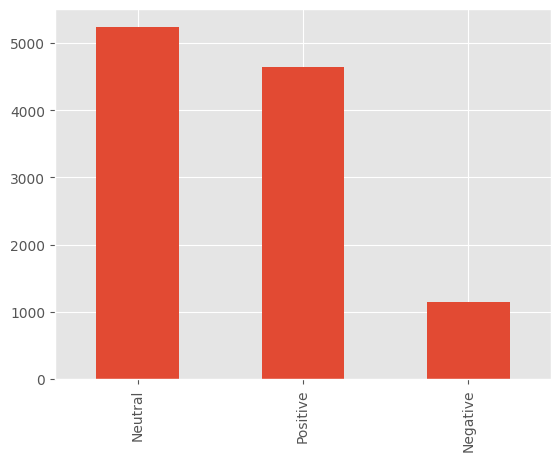

In [39]:
df['sentiment'].value_counts().plot(kind='bar')

In [40]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [41]:
positive_tweet

5        Does anyone have any useful advice/guidance fo...
7        There have not been many bright days in 2020 b...
10       while deaths are closing in on the 300000 mark...
11                                 Best wishes to the US… 
12       The agency also released new information for h...
                               ...                        
11006     ~10% of children aged 511 have got a first sh...
11008    I am fully vaccinated 💯💉🦠 Thank you Magsingal ...
11012    Yes Children ages 5–11 years receive onethird ...
11013    And back to for the booster This time its afte...
11016                                        First dose ✅ 
Name: clean_tweet, Length: 4638, dtype: object

In [42]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [43]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [44]:
positive_tweet_list 

['useful advice/guidance COVID vaccine safe whilst breastfeeding…',
 'bright days 2020 best 1 winning',
 'deaths closing 300000 mark millions people wait U…',
 'Best wishes US…',
 'agency released new information health care providers patients shipped millions d…',
 'Trump announces rollout 24 hours Americans vaccinated against…',
 'Coronavirus: Iran reports 8201 new cases 221 deaths 24 hours',
 'paid approve sudden money makes world',
 'Trump announces rollout 24 hours Americans vaccinated against…',
 'Presenting Medical News/Advancement past week dont want miss',
 'Interesting detailed article showing tested help d…',
 '6 deaths far death worry 🤔',
 'Trump announces rollout 24 hours Americans vaccinated against…',
 'I’ve excited vaccine 💉💉💉',
 'Building week’s ‘trial’ run extending vaccination 💉 programme week effort going b…',
 'COVID19 vaccine doses arrived Oregon Watch 6am 9am tomorrow det…',
 'great feeling big thank healthcare professionals scientists nurses doctors caregivers…'

In [45]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

useful
advice/guidance
COVID
vaccine
safe
whilst
breastfeeding…
bright
days
2020
best
1
winning
deaths
closing
300000
mark
millions
people
wait
U…
Best
wishes
US…
agency
released
new
information
health
care
providers
patients
shipped
millions
d…
Trump
announces
rollout
24
hours
Americans
vaccinated
against…
Coronavirus:
Iran
reports
8201
new
cases
221
deaths
24
hours
paid
approve
sudden
money
makes
world
Trump
announces
rollout
24
hours
Americans
vaccinated
against…
Presenting
Medical
News/Advancement
past
week
dont
want
miss
Interesting
detailed
article
showing
tested
help
d…
6
deaths
far
death
worry
🤔
Trump
announces
rollout
24
hours
Americans
vaccinated
against…
I’ve
excited
vaccine
💉💉💉
Building
week’s
‘trial’
run
extending
vaccination
💉
programme
week
effort
going
b…
COVID19
vaccine
doses
arrived
Oregon
Watch
6am
9am
tomorrow
det…
great
feeling
big
thank
healthcare
professionals
scientists
nurses
doctors
caregivers…
Members
delivered
morning
Getting
dose
weekend
seeing
r…
taking
CO

In [46]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [47]:
pos_tokens

['useful',
 'advice/guidance',
 'COVID',
 'vaccine',
 'safe',
 'whilst',
 'breastfeeding…',
 'bright',
 'days',
 '2020',
 'best',
 '1',
 'winning',
 'deaths',
 'closing',
 '300000',
 'mark',
 'millions',
 'people',
 'wait',
 'U…',
 'Best',
 'wishes',
 'US…',
 'agency',
 'released',
 'new',
 'information',
 'health',
 'care',
 'providers',
 'patients',
 'shipped',
 'millions',
 'd…',
 'Trump',
 'announces',
 'rollout',
 '24',
 'hours',
 'Americans',
 'vaccinated',
 'against…',
 'Coronavirus:',
 'Iran',
 'reports',
 '8201',
 'new',
 'cases',
 '221',
 'deaths',
 '24',
 'hours',
 'paid',
 'approve',
 'sudden',
 'money',
 'makes',
 'world',
 'Trump',
 'announces',
 'rollout',
 '24',
 'hours',
 'Americans',
 'vaccinated',
 'against…',
 'Presenting',
 'Medical',
 'News/Advancement',
 'past',
 'week',
 'dont',
 'want',
 'miss',
 'Interesting',
 'detailed',
 'article',
 'showing',
 'tested',
 'help',
 'd…',
 '6',
 'deaths',
 'far',
 'death',
 'worry',
 '🤔',
 'Trump',
 'announces',
 'rollout',
 

In [48]:
# Get Most Commonest Keywords
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result
get_tokens(pos_tokens)

{'vaccine': 1355,
 'dose': 748,
 'today': 349,
 'Pfizer': 278,
 'got': 273,
 'COVID19': 233,
 'effective': 215,
 'amp': 210,
 'received': 209,
 'vaccines': 203,
 'doses': 184,
 'shot': 182,
 'new': 177,
 'second': 177,
 'people': 175,
 'vaccinated': 174,
 'vaccination': 163,
 'Vaccine': 163,
 'jab': 149,
 'Thanks': 147,
 '2nd': 147,
 'Got': 138,
 'good': 137,
 'Covid19': 136,
 '💉': 132,
 'Thank': 132,
 'day': 118,
 'the…': 109,
 '1st': 107,
 '2': 105}

In [49]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,vaccine,246
1,dose,113
2,Pfizer,72
3,2nd,62
4,amp,58
5,arm,51
6,people,51
7,today,46
8,second,45
9,shot,43


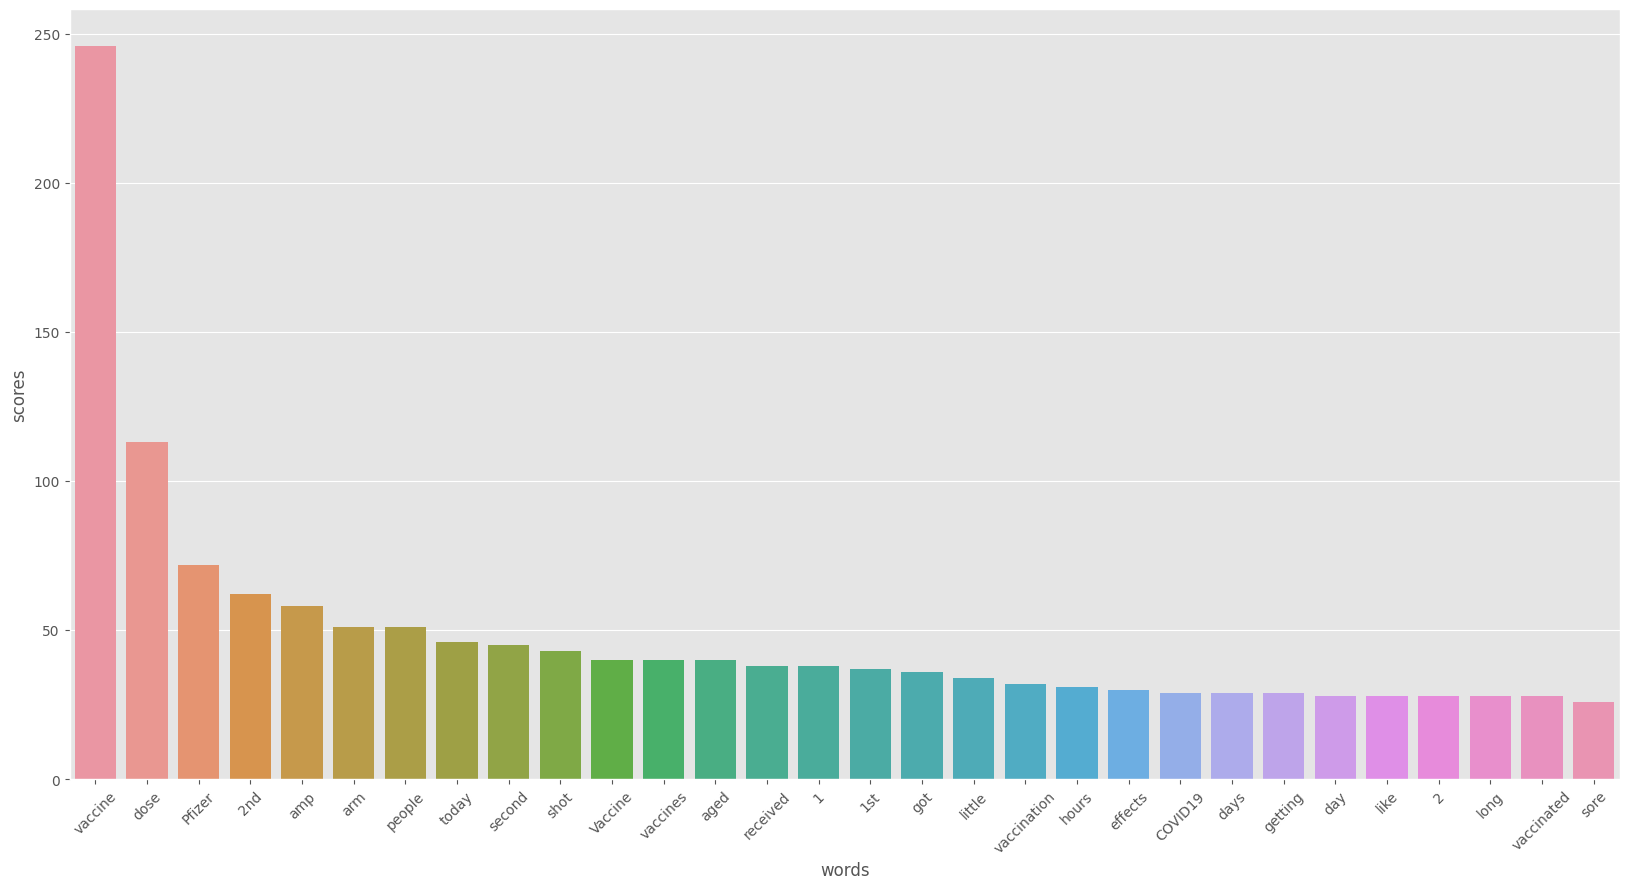

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

C:\Users\INDU J A\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


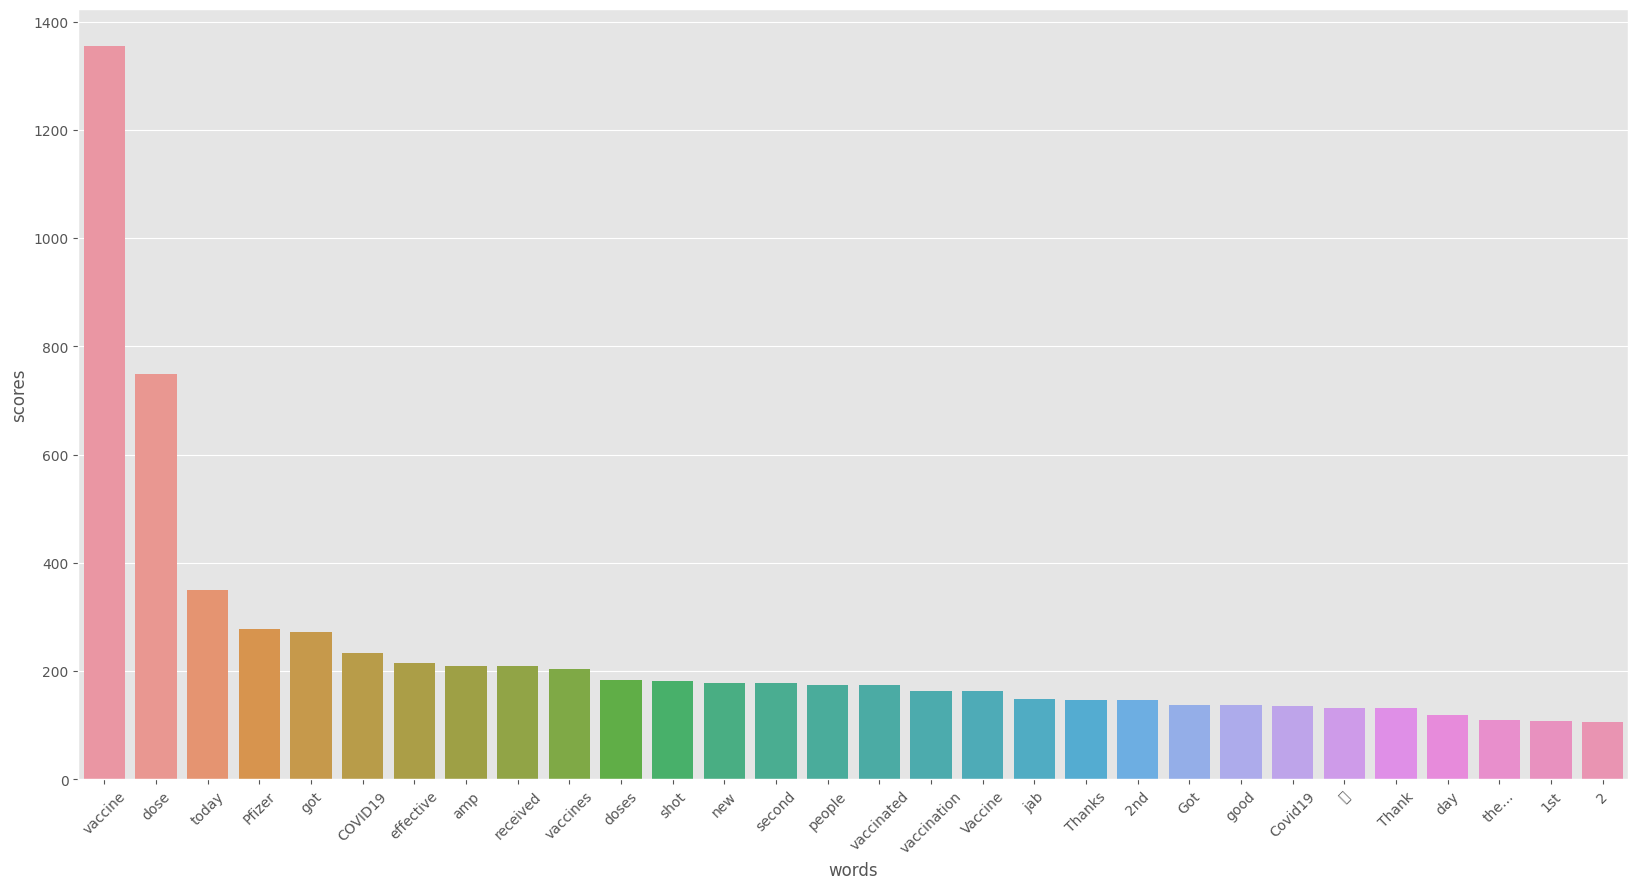

In [51]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

C:\Users\INDU J A\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


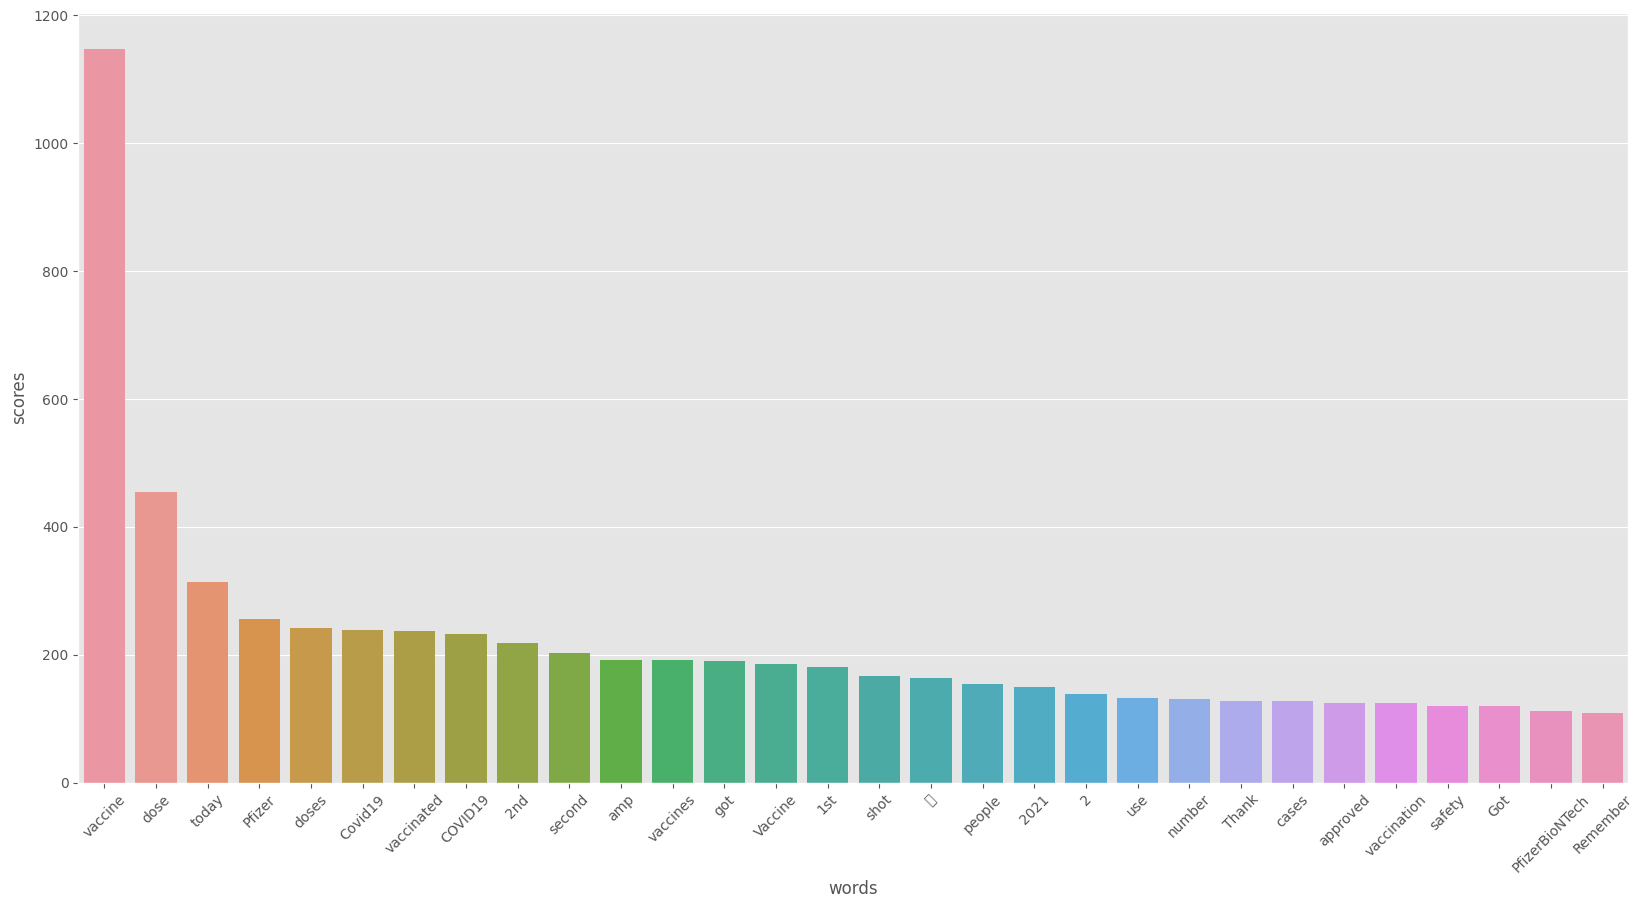

In [52]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [53]:
### Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

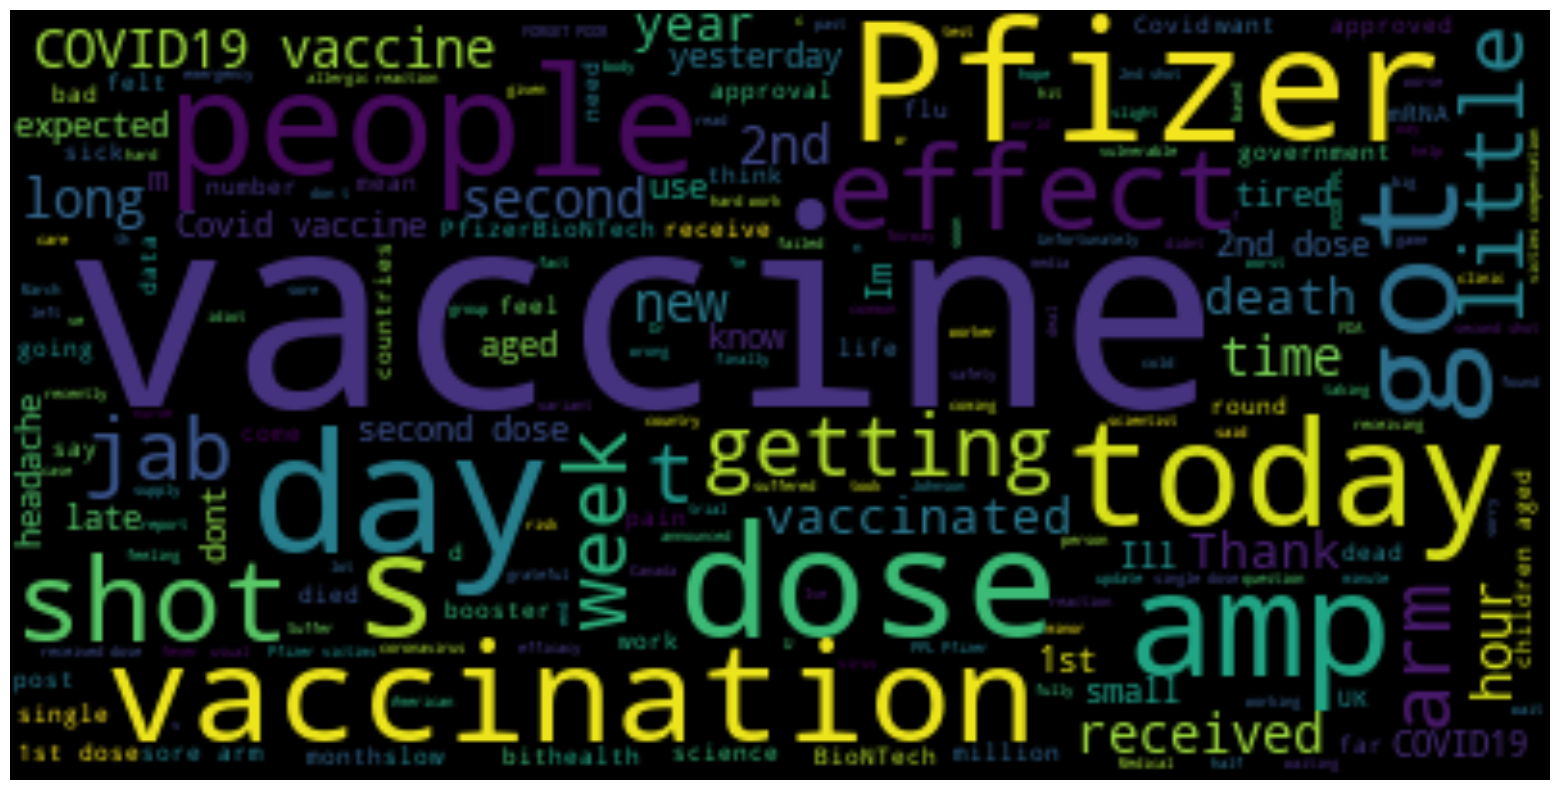

In [54]:
plot_wordcloud(neg_docx)

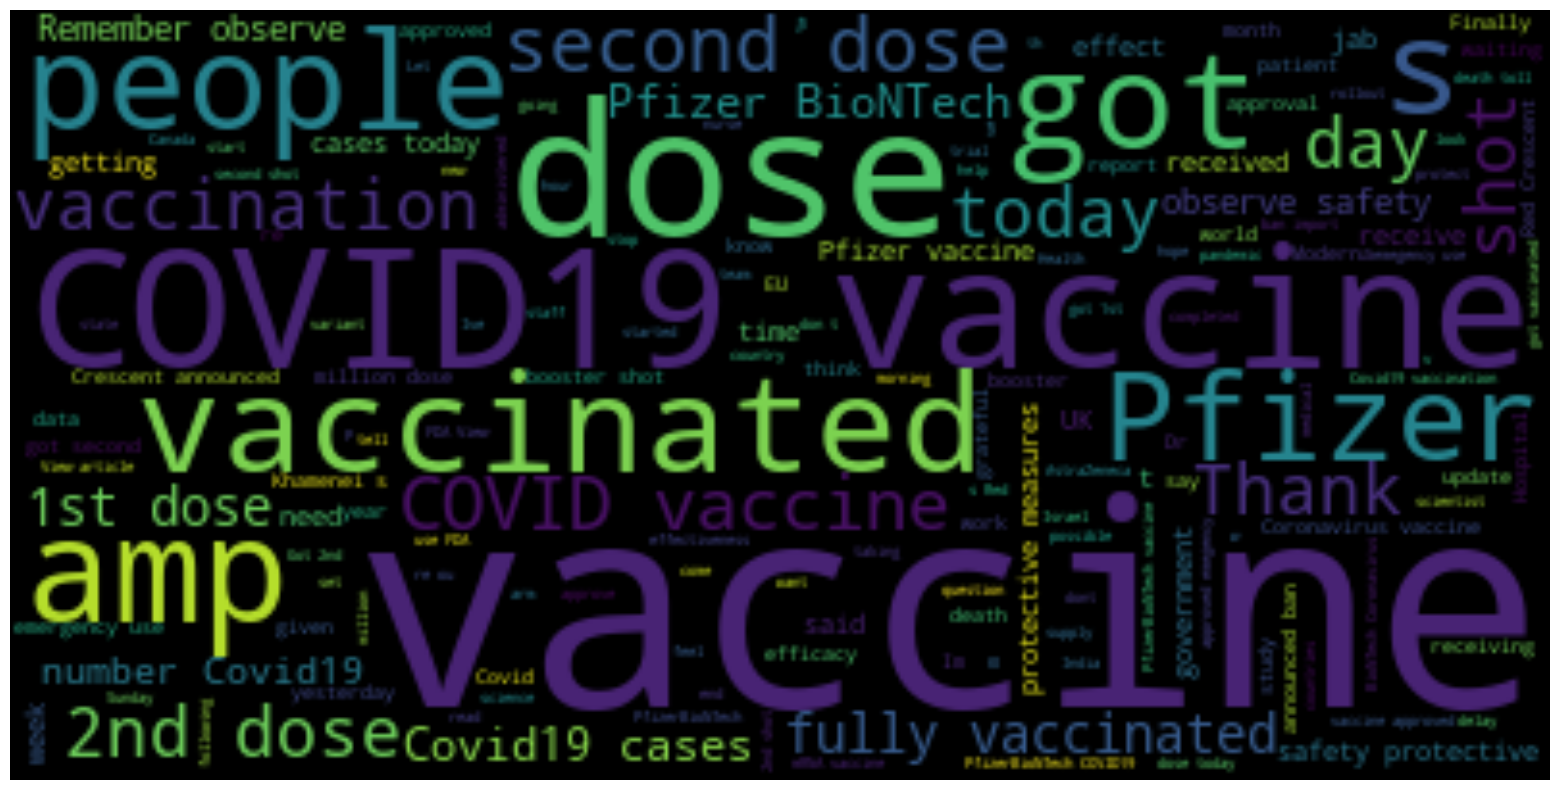

In [55]:
plot_wordcloud(neu_docx)

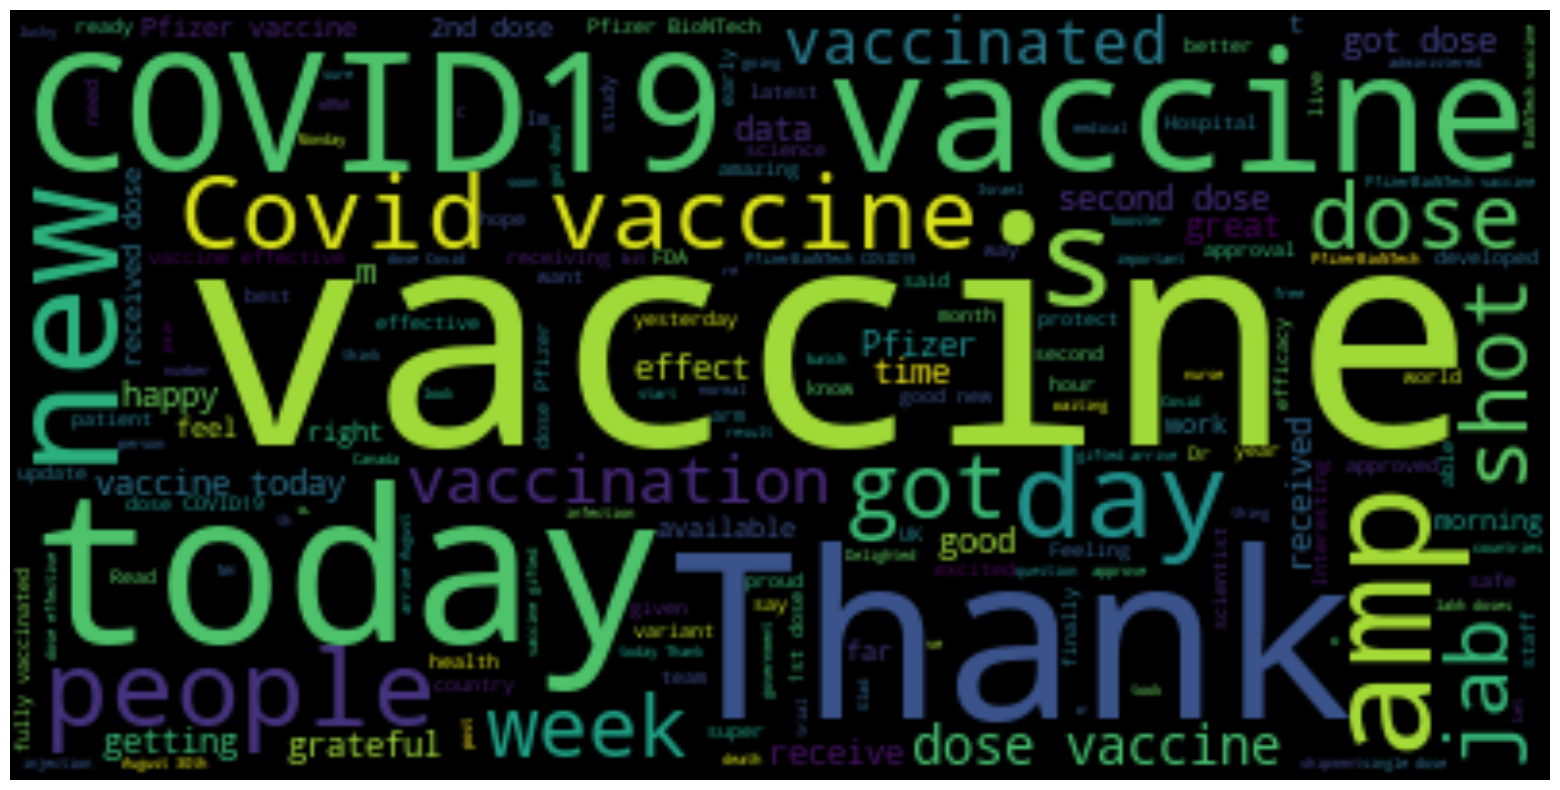

In [56]:
plot_wordcloud(pos_docx)

Text(0.5, 1.0, 'Distribution of sentiments')

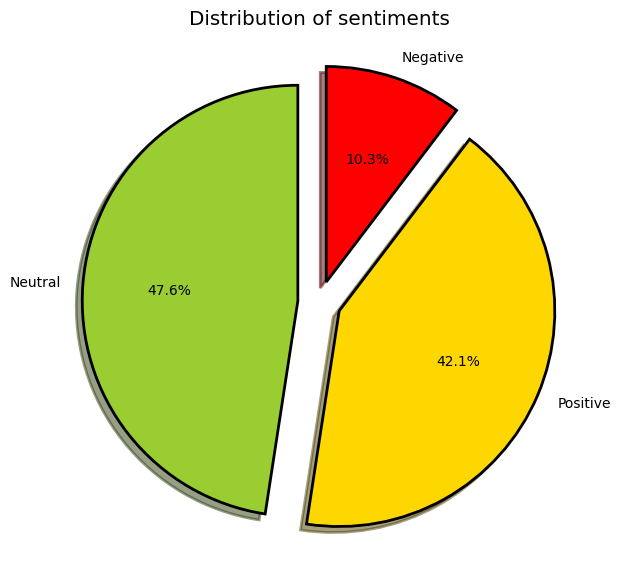

In [57]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

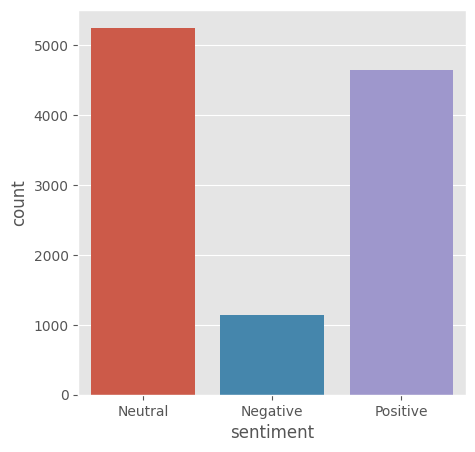

In [58]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)


In [59]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 113986

First 20 features:
 ['00', '00 000', '00 am', '00 doses', '00 hkt', '00 https', '00 on', '00 tonight', '000', '000 987', '000 advers', '000 adverse', '000 albertans', '000 americans', '000 and', '000 australians', '000 citizens', '000 coronavirus', '000 covid19', '000 covidbrazil']


C:\Users\INDU J A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
X = df['text']
Y = df['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8816, 113986)
Size of y_train: (8816,)
Size of x_test: (2204, 113986)
Size of y_test: (2204,)


In [61]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.89%


In [62]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 68 123  38]
 [ 10 987  35]
 [ 11 160 772]]


              precision    recall  f1-score   support

    Negative       0.76      0.30      0.43       229
     Neutral       0.78      0.96      0.86      1032
    Positive       0.91      0.82      0.86       943

    accuracy                           0.83      2204
   macro avg       0.82      0.69      0.72      2204
weighted avg       0.83      0.83      0.82      2204



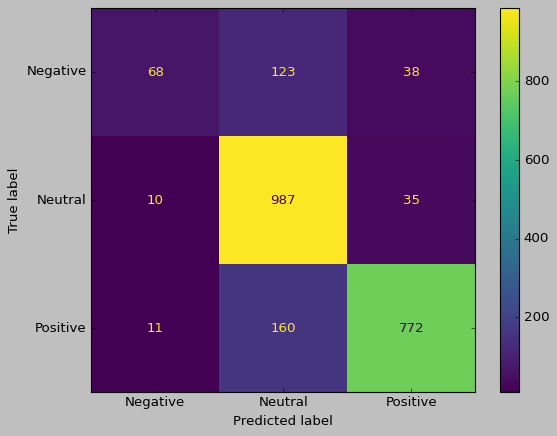

In [68]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [70]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [71]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.89%


In [72]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 78 112  39]
 [ 11 990  31]
 [ 12 150 781]]


              precision    recall  f1-score   support

    Negative       0.77      0.34      0.47       229
     Neutral       0.79      0.96      0.87      1032
    Positive       0.92      0.83      0.87       943

    accuracy                           0.84      2204
   macro avg       0.83      0.71      0.74      2204
weighted avg       0.84      0.84      0.83      2204



In [73]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [74]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 84.53%


In [75]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 86 106  37]
 [ 13 989  30]
 [ 16 139 788]]


              precision    recall  f1-score   support

    Negative       0.75      0.38      0.50       229
     Neutral       0.80      0.96      0.87      1032
    Positive       0.92      0.84      0.88       943

    accuracy                           0.85      2204
   macro avg       0.82      0.72      0.75      2204
weighted avg       0.85      0.85      0.84      2204



In [76]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [77]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [78]:
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.57%


In [79]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 87 106  36]
 [ 13 990  29]
 [ 19 137 787]]


              precision    recall  f1-score   support

    Negative       0.73      0.38      0.50       229
     Neutral       0.80      0.96      0.87      1032
    Positive       0.92      0.83      0.88       943

    accuracy                           0.85      2204
   macro avg       0.82      0.72      0.75      2204
weighted avg       0.85      0.85      0.84      2204

